## Concept of MLE

Let's say we have some data,<br>
The goal of maximum likelihood is to find the optimal way to fit a distribution to the data.

The reason behind fitting a distribution to our data is it can be easier to work with and it is also more general i.e. It applies to every experiment of same type.

#### Normally Distributed Data

Consider a normally distributed data.<br>
For our example, Let's take an example of mouse weights distribution.
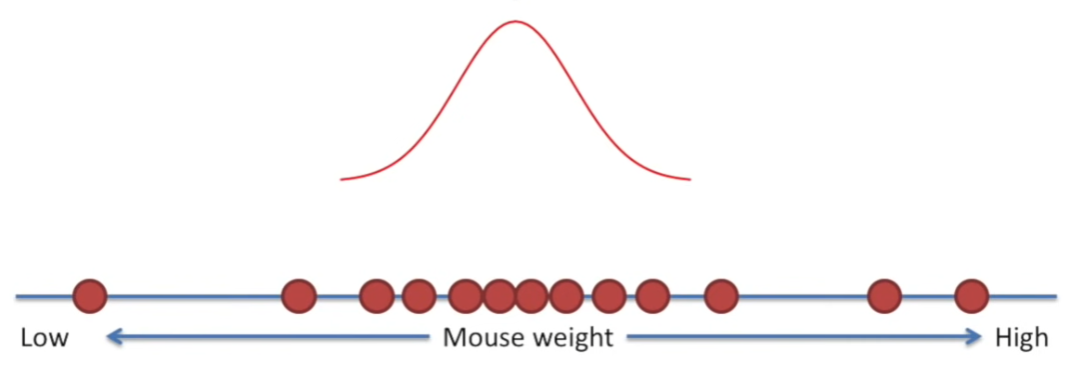

Normally distributed means a lot of things:


*   Most of the measurements are expected to be close to mean.
*   Measurements are expected to be relatively symmetrical around the mean.





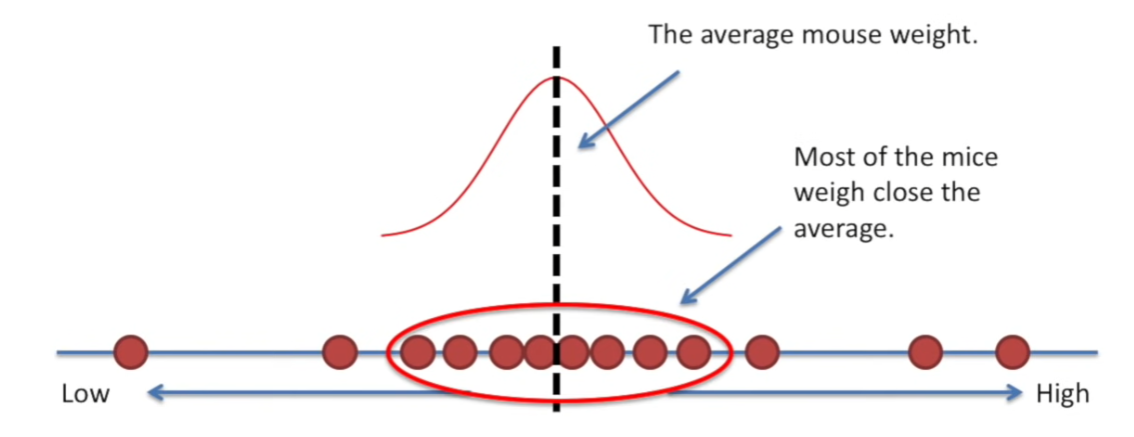

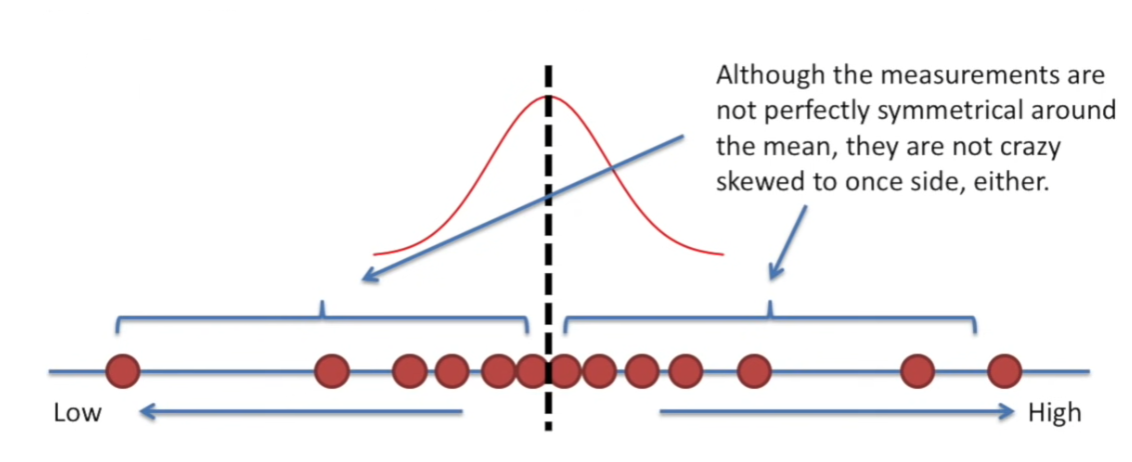

Normal Distribution can come in all shapes and sizes.
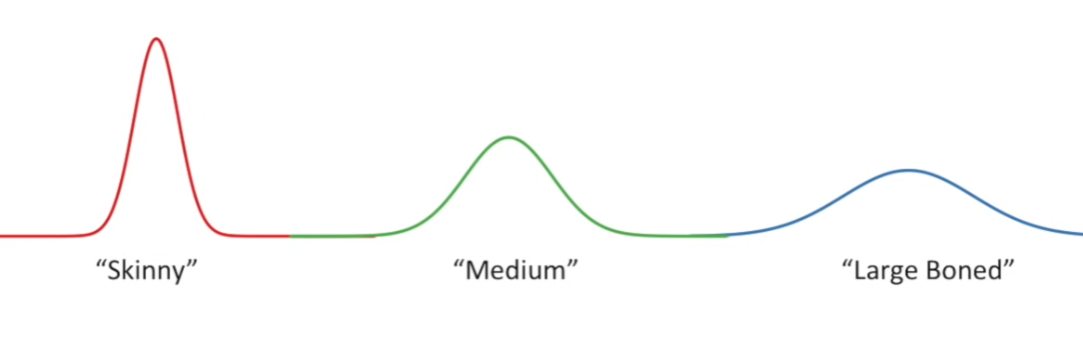

Once the shape is determined, we have to figure out where to centre the distribution.<br>
Different locations can be tried out to find the best one.

Let's take a random Normal Distribution and see how well it fits the data.

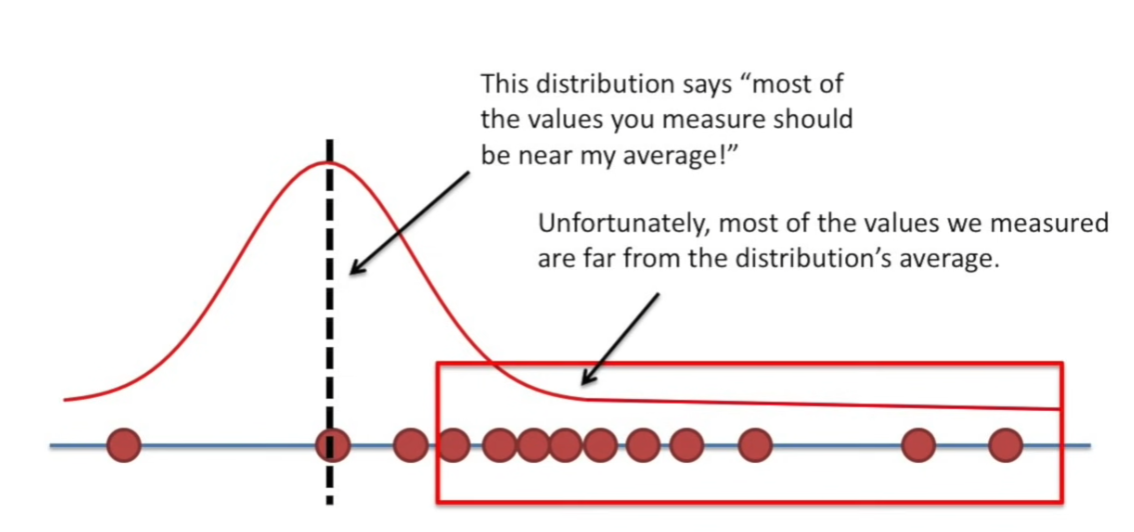

What if we shifted the distribution in following manner:

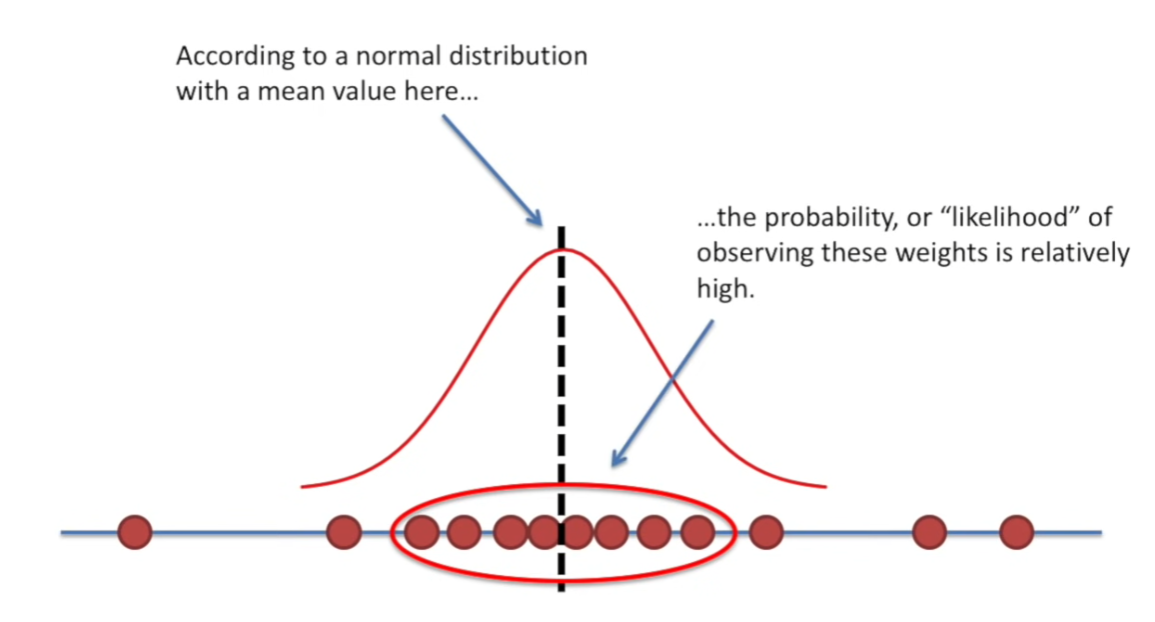

Also, If we shifted the distribution over to right,

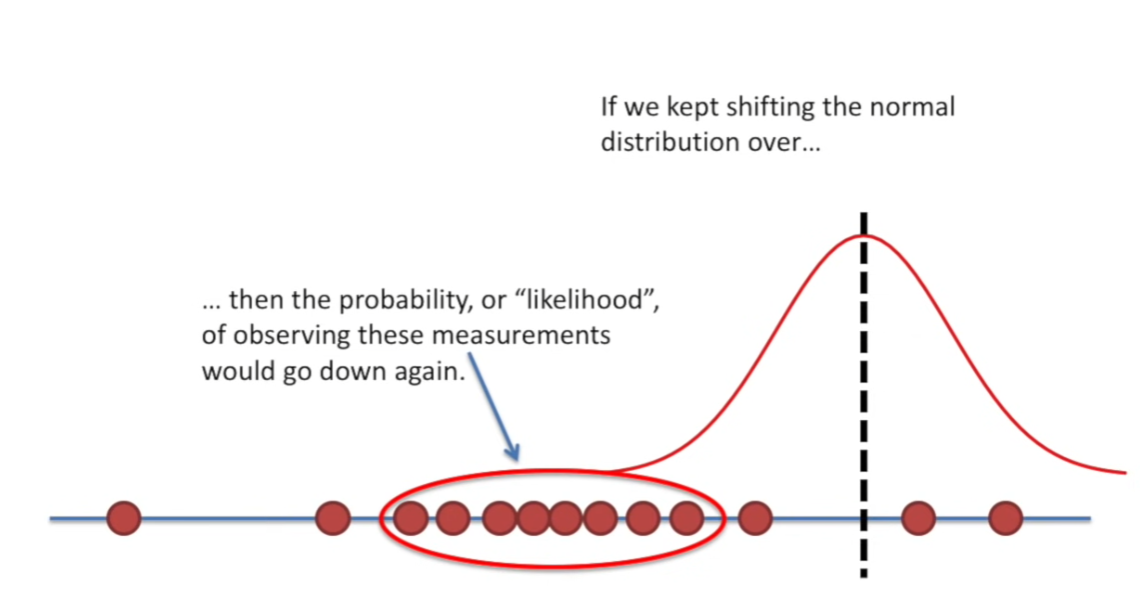

For MLE, we can plot the likelihood of observing the data over location of the centre of distribution.

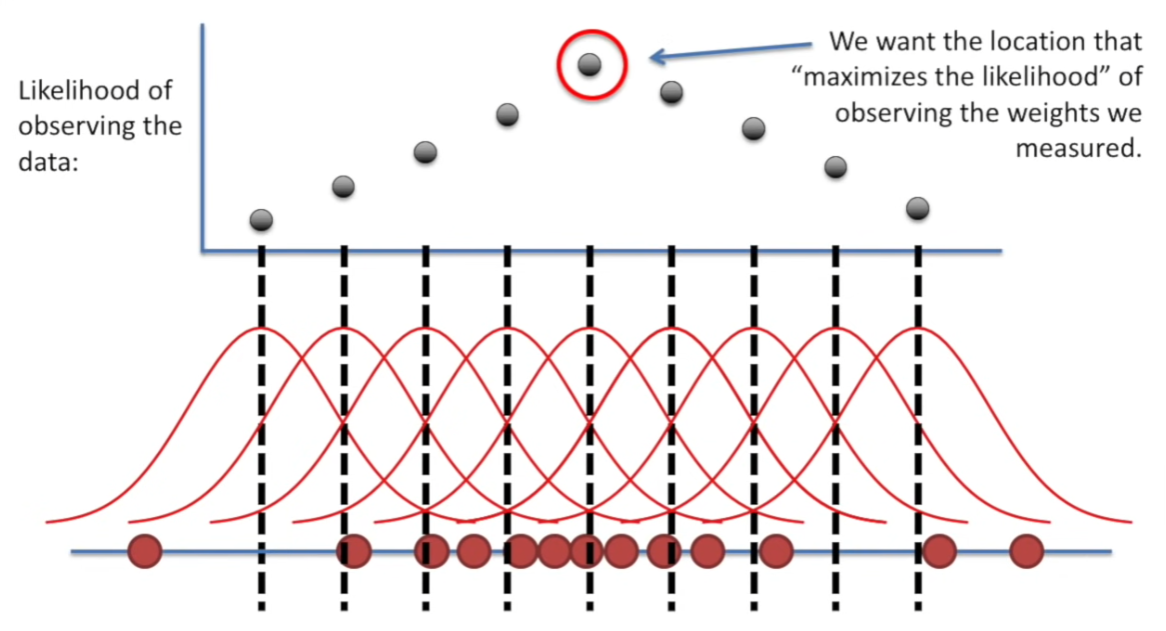



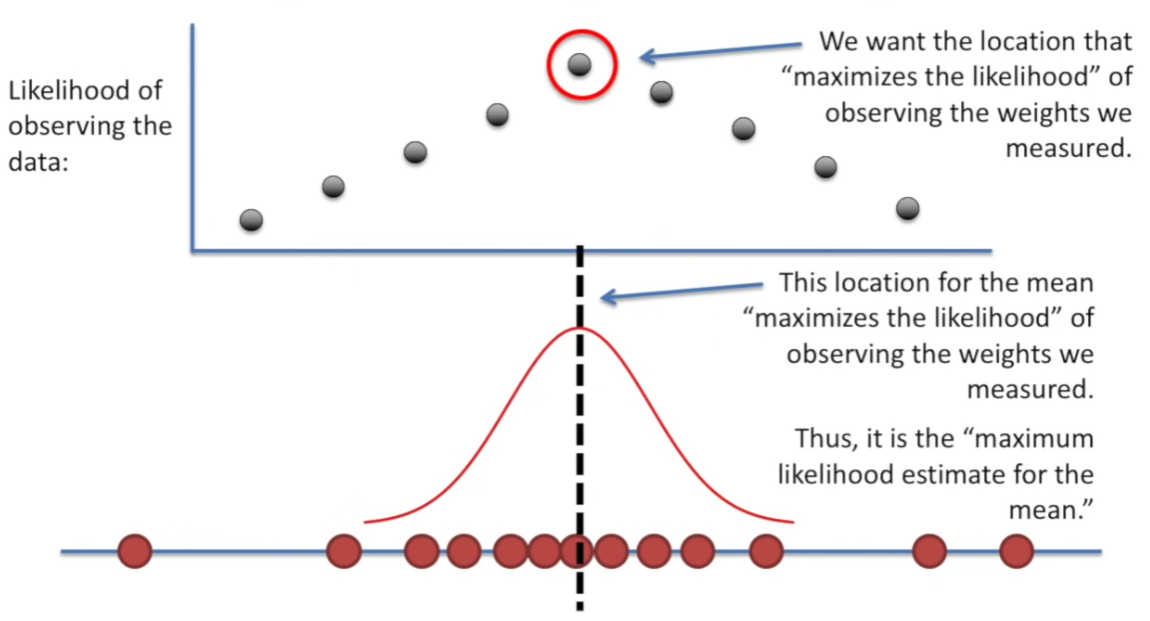

Note that we have calculated the MLE for mean of distribution and not data.<br>
However, it is same in case of normal distribution.

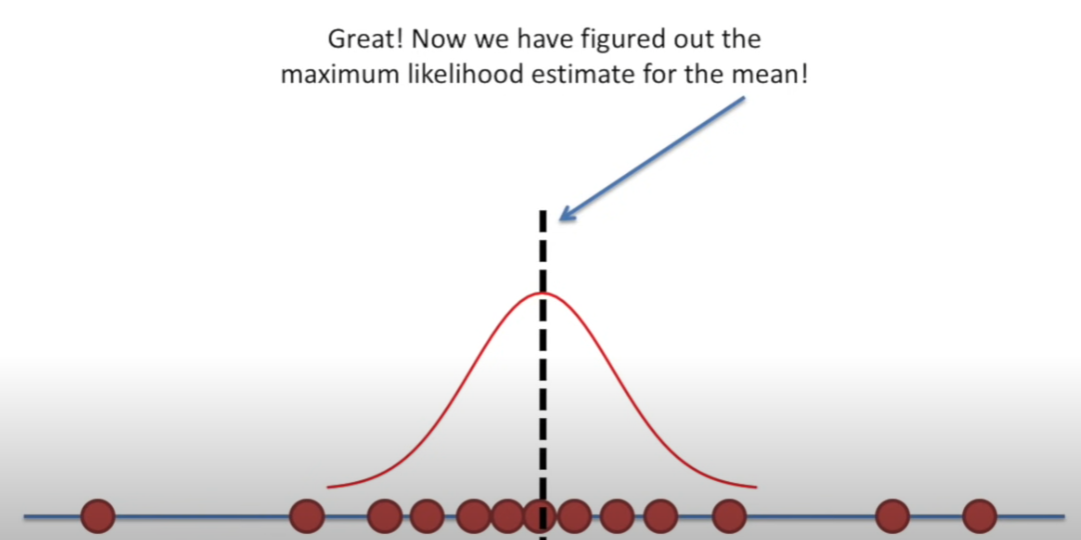

We also have to figure out the maximum likelihood estimate for standard deviation.

Again, we can plot the likelihood of observing the data over different values of standard deviation.

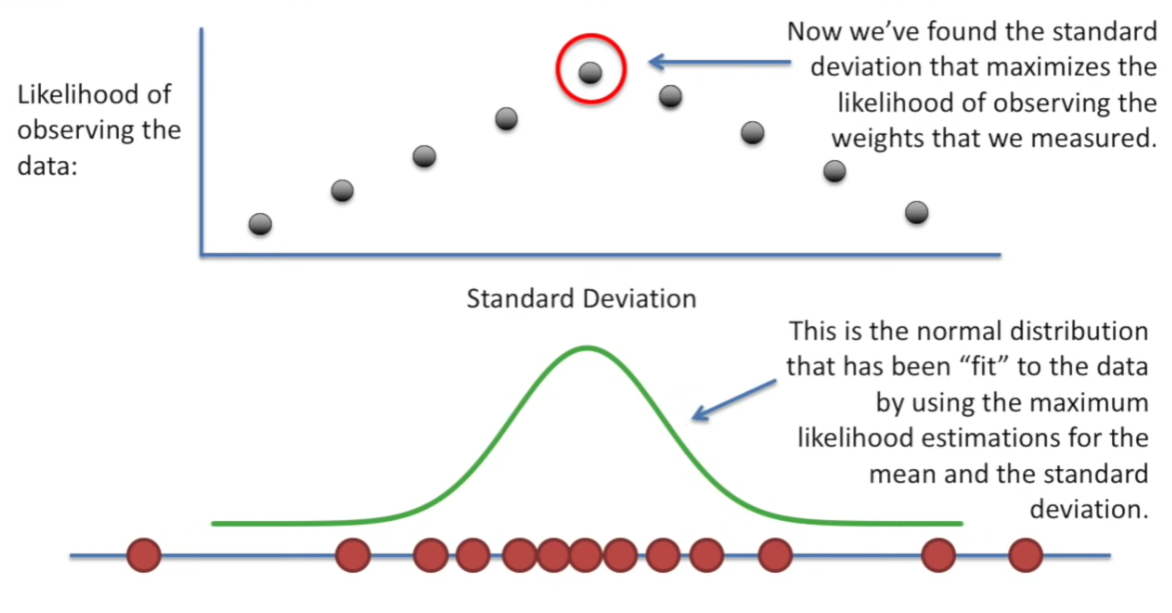

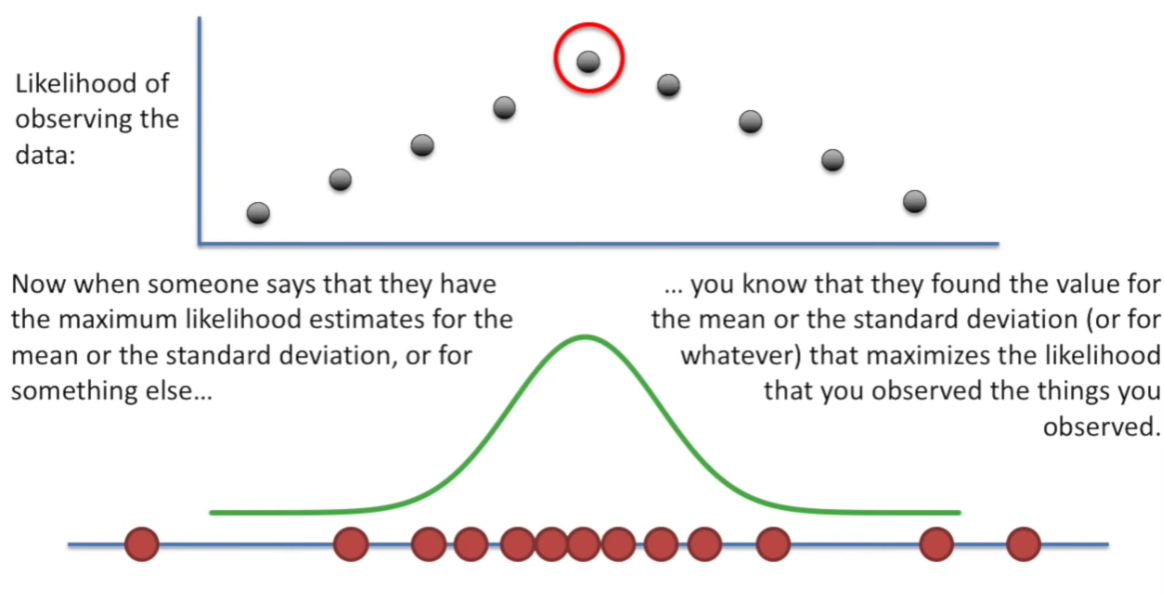

In [1]:
pip install silence_tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In order to automatically supress tensorflow warnings, import `silence_tensorflow.auto`

In [2]:
import silence_tensorflow.auto

In [3]:
import tensorflow as tf

In [4]:
# Import tensorflow_probability
import tensorflow_probability as tfp

Let us consider weather as the model. We can represent weather as either good weather or bad weather.

In [5]:
# Instantiate our weather model
weather = tfp.distributions.Bernoulli(probs = 0.8, name="weather")

In [6]:
weather

<tfp.distributions.Bernoulli 'weather' batch_shape=[] event_shape=[] dtype=int32>

Now, we can sample the weather in order to get the dataset.

In [7]:
weather.sample(100)

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)>

In [8]:
dataset = weather.sample(100)

Now, we set the MLE for mean.

In [9]:
tf.reduce_mean(dataset)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

We need to convert it to float to get the exact value.

In [10]:
tf.reduce_mean(tf.cast(dataset, float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.83>

Well, the mean is not 0.8 and it may be because of various reasons. This is not a problem.

In [11]:
# Try again
tf.reduce_mean(tf.cast(weather.sample(100), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [12]:
# Try again
tf.reduce_mean(tf.cast(weather.sample(100), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.74>

In [13]:
# Try again
tf.reduce_mean(tf.cast(weather.sample(100), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.78>

In [14]:
# Try again
tf.reduce_mean(tf.cast(weather.sample(100), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.74>

In [15]:
# Let's consider more data and try again
tf.reduce_mean(tf.cast(weather.sample(1000), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.804>

In [16]:
# Let's consider more data and try again
tf.reduce_mean(tf.cast(weather.sample(10000), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.7963>

In [17]:
# Let's consider more data and try again
tf.reduce_mean(tf.cast(weather.sample(100000), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.79936>

In [18]:
# Let's consider more data and try again
tf.reduce_mean(tf.cast(weather.sample(1000000), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.799459>

In [19]:
# Let's consider more data and try again
tf.reduce_mean(tf.cast(weather.sample(1000000), float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.799618>

As the data increases, we get closer and closer to 0.8. So, we can confirm that derived mean is the MLE for bernoulli distribution.